# Capstone Project

## <font color='Orange'>Submitted by : Onkar</font>

## Objective
In this notebook, we will analyze customer's data and build several machine learning models to predict the potential clients for personal loan.

## Problem Statement
A popular bank in USA is offering personal loans and they have a team who is involved in cold calling people to identify prospective customers. Cold calling is a process of getting data from any source and calling prospect leads rigorously just to understand if anybody is interested to avail loan from the bank. This process is rigorous, Time & cost consuming. The bank is now planning to optimize the cost involved in cold-calling. We have to analyze the customer’s data to identify potential leads.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Customer Data
The dataset consists of several thousand customer records, each of which contains the values of customer demographics and financial information. The fields in each record are:

| Columns | Description | 
|:----:|:----|
|  ID  |  Unique Customer ID  |
|  Gender  |  Gender of the applicant  |
|  DOB  |  Date of Birth of the applicant  |
|  LeadCreationDate  |  Date on which Lead was created  |
|  City_Code  |  Anonymised Code for the City  |
|  City_Feature  |  Anonymised City Feature  |
|  Employee_No  |  Anonymised Code for the Employer  |
|  Employer_type1  |  Anonymised Employer Feature  |
|  Employer_type2  |  Anonymised Employer Feature  |
|  Income  |  Monthly Income in Dollars  |
|  Customer_bank_code  |  Anonymised Customer Bank Code  |
|  ExistingBankType  |  Anonymised Bank Feature  |
|  Contacted  |  Contact Verified (Y/N)  |
|  Source  |  Categorical Variable representing source of lead  |
|  Source_Cat  |  Type of Source  |
|  Existing_EMI  |  EMI of Existing Loans in Dollars  |
|  Feature1  |  Anonymized Categorical variable with multiple levels  |
|  Approved  |  Whether a loan is Approved or not (1-0)  |

The ID field contains customer identifiers. The customer details are contained in fields Gender to Feature1. The Approved field contains loan approved status where 1 indicates approval of loan and 0 indicates rejection of loan.

In [2]:
dataset = pd.read_csv('Bank.csv')
dataset.head()

ID  Gender         DOB LeadCreationDate City_Code  \
0  APPP10987536114  Female  17-06-1993       02-09-2016    C10002   
1  APPJ10857173523  Female  16-04-1991       03-07-2016    C10003   
2  APPN40005263144  Female  22-11-1986       04-07-2016    C10001   
3  APPF20377669543  Female  11-01-1990       05-08-2016    C10001   
4  APPL30007442336  Female  03-04-1994       23-08-2016    C10043   

  City_Feature Employee_No Employer_type1  Employer_type2  Income  \
0            A  COM0052877              A               4     1.4   
1            A  COM0000002              C               1     2.3   
2            A  COM0005816              A               4     3.5   
3            A  COM0000005              A               1   200.0   
4            B  COM0023428              A               4   200.0   

  Customer_bank_code ExistingBankType Contacted Source Source_Cat  \
0               B029                G         N   S122          G   
1               B005                P         N   S133          C   
2               B002                P         N   S133          C   
3               B001                P         N   S122          B   
4               B003                G         N   S133          B   

   Existing_EMI  Feature1  Approved  
0           0.0         0         0  
1           0.0         0         0  
2           0.0         0         0  
3           0.0         0         0  
4           0.0         0         0

Let's look at the structure of our dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1982 non-null   object 
 1   Gender              1982 non-null   object 
 2   DOB                 1982 non-null   object 
 3   LeadCreationDate    1982 non-null   object 
 4   City_Code           1982 non-null   object 
 5   City_Feature        1982 non-null   object 
 6   Employee_No         1982 non-null   object 
 7   Employer_type1      1982 non-null   object 
 8   Employer_type2      1982 non-null   int64  
 9   Income              1982 non-null   float64
 10  Customer_bank_code  1982 non-null   object 
 11  ExistingBankType    1982 non-null   object 
 12  Contacted           1982 non-null   object 
 13  Source              1982 non-null   object 
 14  Source_Cat          1982 non-null   object 
 15  Existing_EMI        1982 non-null   float64
 16  Featur

Our dataframe contains 1982 rows of customer data. Now, let's check if there are any duplicated values in it:

In [4]:
dataset[dataset.duplicated(subset=['ID'])].shape[0]

0

We see that there are no duplicate entries in our dataframe. Now, let's check for missing values. The following table shows percentage of missing values for different columns in our dataframe.

In [5]:
dataset.isna().sum()/len(dataset)

ID                    0.0
Gender                0.0
DOB                   0.0
LeadCreationDate      0.0
City_Code             0.0
City_Feature          0.0
Employee_No           0.0
Employer_type1        0.0
Employer_type2        0.0
Income                0.0
Customer_bank_code    0.0
ExistingBankType      0.0
Contacted             0.0
Source                0.0
Source_Cat            0.0
Existing_EMI          0.0
Feature1              0.0
Approved              0.0
dtype: float64

Our customer dataset contains no missing values. Now, we will check if our dataset is balanced or not.

In [6]:
dataset[dataset['Approved'] == 1].shape[0], dataset[dataset['Approved'] == 0].shape[0]

(991, 991)

Our dataset is perfectly balanced with 991 approvals and 991 rejections.

## Visualizing target variable

Let's look at the distribaution of loans based on Existing EMI and Income:

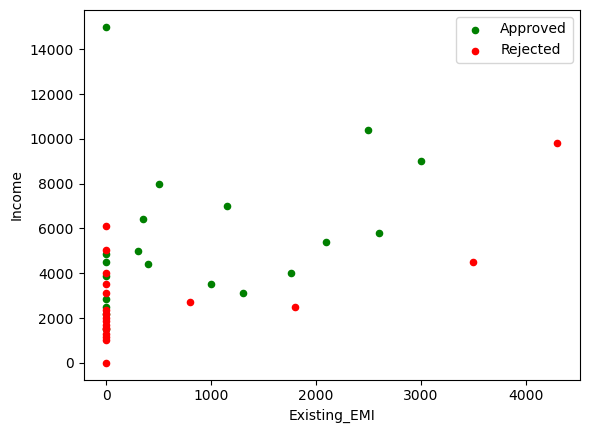

In [7]:
ax = dataset[dataset['Approved'] == 1][0:991:50].plot(kind='scatter', x='Existing_EMI', y='Income', color='Green', label='Approved')
dataset[dataset['Approved'] == 0][0:991:50].plot(kind='scatter', x='Existing_EMI', y='Income', color='Red', label='Rejected', ax=ax)
plt.show()

We observe that for a fixed existing EMI with increase in income, our chances of getting a load approved incerases. Also, for a fixed income our chances chances of getting a loan approved decreases with increase in existing EMI.

Now, let's look at the distribaution of loans based on Employer_type1 EMI and Income:

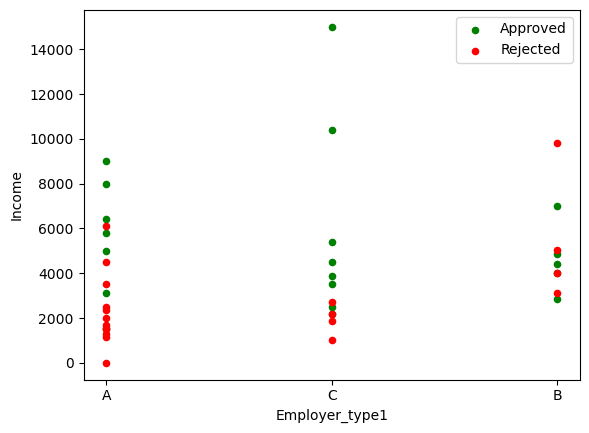

In [8]:
ax = dataset[dataset['Approved'] == 1][0:991:50].plot(kind='scatter', x='Employer_type1', y='Income', color='Green', label='Approved')
dataset[dataset['Approved'] == 0][0:991:50].plot(kind='scatter', x='Employer_type1', y='Income', color='Red', label='Rejected', ax=ax)
plt.show()

Now, let's look at the distribaution of loans based on Employer_type2 EMI and Income:

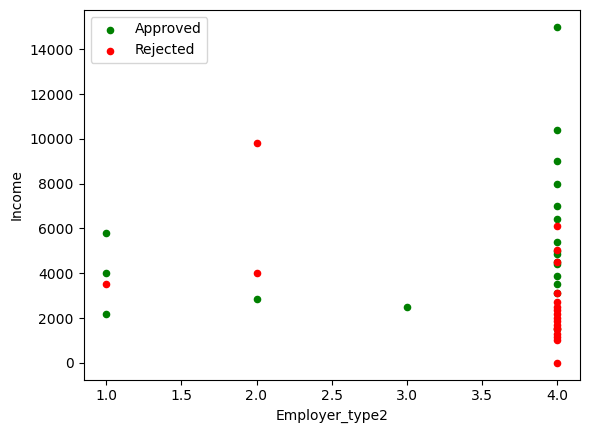

In [9]:
ax = dataset[dataset['Approved'] == 1][0:991:50].plot(kind='scatter', x='Employer_type2', y='Income', color='Green', label='Approved')
dataset[dataset['Approved'] == 0][0:991:50].plot(kind='scatter', x='Employer_type2', y='Income', color='Red', label='Rejected', ax=ax)
plt.show()

Now, let's look at the distribaution of loans based on ExistingBankType EMI and Income:

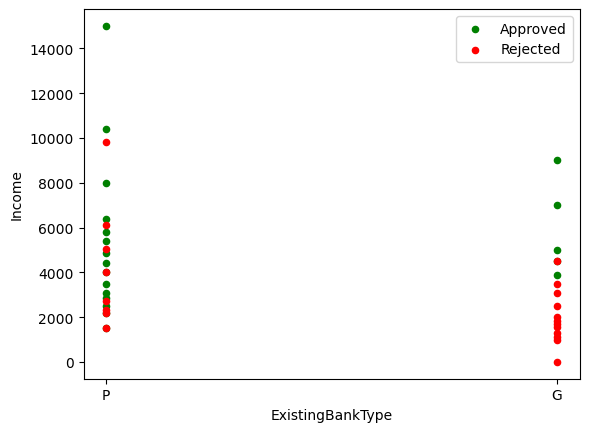

In [10]:
ax = dataset[dataset['Approved'] == 1][0:991:50].plot(kind='scatter', x='ExistingBankType', y='Income', color='Green', label='Approved')
dataset[dataset['Approved'] == 0][0:991:50].plot(kind='scatter', x='ExistingBankType', y='Income', color='Red', label='Rejected', ax=ax)
plt.show()

Here, we observed that in Private Banks it is easier to get a loan approved with less income as compared to Government Banks.

## Data Pre-processing and Selection

We now create a copy of above dataframe as new dataframe with only below mentioned features:

<ol>
  <li>Gender</li>
  <li>City_Feature</li>
  <li>Temployer_type1</li>
  <li>Employer_type2</li>
  <li>Income</li>
  <li>ExistingBankType</li>
  <li>Source_Cat</li>
  <li>Existing_EMI</li>   
  <li>Feature1</li>
  <li>Approved</li>
</ol>

In [11]:
df = dataset[['Gender', 'City_Feature', 'Employer_type1', 'Employer_type2', 'Income',
       'ExistingBankType', 'Source_Cat', 'Existing_EMI', 'Feature1', 'Approved']]
df.head()

Gender City_Feature Employer_type1  Employer_type2  Income  \
0  Female            A              A               4     1.4   
1  Female            A              C               1     2.3   
2  Female            A              A               4     3.5   
3  Female            A              A               1   200.0   
4  Female            B              A               4   200.0   

  ExistingBankType Source_Cat  Existing_EMI  Feature1  Approved  
0                G          G           0.0         0         0  
1                P          C           0.0         0         0  
2                P          C           0.0         0         0  
3                P          B           0.0         0         0  
4                G          B           0.0         0         0

Let's have a look at unique values in categorical columns:

In [12]:
print(df['Gender'].unique())
print(df['City_Feature'].unique())
print(df['Employer_type1'].unique())
print(df['ExistingBankType'].unique())
print(df['Source_Cat'].unique())

['Female' 'Male']
['A' 'B' 'C']
['A' 'C' 'B']
['G' 'P']
['G' 'C' 'B' 'E' 'F']


We will use label Encoding technique to convert non-numeric features to into numeric ones.

In [13]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'City_Feature', 'Employer_type1', 'ExistingBankType', 'Source_Cat']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

Gender  City_Feature  Employer_type1  Employer_type2  Income  \
0       0             0               0               4     1.4   
1       0             0               2               1     2.3   
2       0             0               0               4     3.5   
3       0             0               0               1   200.0   
4       0             1               0               4   200.0   

   ExistingBankType  Source_Cat  Existing_EMI  Feature1  Approved  
0                 0           4           0.0         0         0  
1                 1           1           0.0         0         0  
2                 1           1           0.0         0         0  
3                 1           0           0.0         0         0  
4                 0           0           0.0         0         0

Let's look for correlated columns in out dataset:

In [14]:
df.corr()

Gender  City_Feature  Employer_type1  Employer_type2  \
Gender            1.000000     -0.002704        0.096718       -0.016825   
City_Feature     -0.002704      1.000000       -0.076483        0.074398   
Employer_type1    0.096718     -0.076483        1.000000       -0.126651   
Employer_type2   -0.016825      0.074398       -0.126651        1.000000   
Income            0.104091     -0.107410        0.076223       -0.039130   
ExistingBankType  0.053008     -0.259815        0.216727       -0.094883   
Source_Cat        0.018090      0.002697        0.049305       -0.051052   
Existing_EMI     -0.134648     -0.074151        0.047875       -0.064433   
Feature1          0.515595     -0.170468        0.124215       -0.089761   
Approved          0.214233     -0.118839        0.141047       -0.087358   

                    Income  ExistingBankType  Source_Cat  Existing_EMI  \
Gender            0.104091          0.053008    0.018090     -0.134648   
City_Feature     -0.107410         -0.259815    0.002697     -0.074151   
Employer_type1    0.076223          0.216727    0.049305      0.047875   
Employer_type2   -0.039130         -0.094883   -0.051052     -0.064433   
Income            1.000000          0.119378   -0.019238      0.354395   
ExistingBankType  0.119378          1.000000   -0.029764      0.094429   
Source_Cat       -0.019238         -0.029764    1.000000     -0.013595   
Existing_EMI      0.354395          0.094429   -0.013595      1.000000   
Feature1          0.290363          0.171943   -0.087571     -0.032108   
Approved          0.236073          0.163760   -0.007247      0.204067   

                  Feature1  Approved  
Gender            0.515595  0.214233  
City_Feature     -0.170468 -0.118839  
Employer_type1    0.124215  0.141047  
Employer_type2   -0.089761 -0.087358  
Income            0.290363  0.236073  
ExistingBankType  0.171943  0.163760  
Source_Cat       -0.087571 -0.007247  
Existing_EMI     -0.032108  0.204067  
Feature1          1.000000  0.439957  
Approved          0.439957  1.000000

There are no columns in are dataset that are highly correlated.

## Train/Test Split

Firstly, we divide our dataset into dependent and independent variable. Features from Gender to Feature1 are independent and are stored in X and feature Approved is dependent and stored in y.

In [15]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Now, we split our data into train and test variables with 80:20 proportion.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (1585, 9)
y_train : (1585,)
X_test : (397, 9)
y_test : (397,)


Now, we will train and test several machine learning models on our dataset.

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
regressor

LogisticRegression()

In [18]:
y_pred_lr = regressor.predict(X_test)
print(y_pred_lr[:10])
y_pred1_lr = regressor.predict(X_train)
print(y_pred1_lr[:10])

[1 1 1 1 0 0 0 1 0 1]
[0 0 0 0 1 0 1 0 0 1]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predicting the Train and Test set Accuracy
print("Train set Accuracy :",accuracy_score(y_train, y_pred1_lr))
print("Test set Accuracy :",accuracy_score(y_test, y_pred_lr))

Train set Accuracy : 0.7141955835962145
Test set Accuracy : 0.760705289672544


In [20]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[155  54]
 [ 41 147]]


In [21]:
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       209
           1       0.73      0.78      0.76       188

    accuracy                           0.76       397
   macro avg       0.76      0.76      0.76       397
weighted avg       0.76      0.76      0.76       397



## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc

RandomForestClassifier()

In [23]:
y_pred_rf = rfc.predict(X_test)
print(y_pred_rf[:10])
y_pred1_rf = rfc.predict(X_train)
print(y_pred1_rf[:10])

[1 1 1 1 0 0 0 1 0 1]
[0 1 0 0 1 0 1 1 0 1]


In [24]:
# Predicting the Train and Test set Accuracy
print("Train set Accuracy :",accuracy_score(y_train, y_pred1_rf))
print("Test set Accuracy :",accuracy_score(y_test, y_pred_rf))

Train set Accuracy : 0.9873817034700315
Test set Accuracy : 0.7204030226700252


In [25]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[146  63]
 [ 48 140]]


In [26]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       209
           1       0.69      0.74      0.72       188

    accuracy                           0.72       397
   macro avg       0.72      0.72      0.72       397
weighted avg       0.72      0.72      0.72       397



## SVM

In [27]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc

SVC()

In [28]:
y_pred_svm = svc.predict(X_test)
print(y_pred_svm[:10])
y_pred1_svm = svc.predict(X_train)
print(y_pred1_svm[:10])

[1 0 1 0 0 0 0 1 0 1]
[0 1 0 1 1 0 1 1 1 1]


In [29]:
# Predicting the Train and Test set Accuracy
print("Train set Accuracy :",accuracy_score(y_train, y_pred1_svm))
print("Test set Accuracy :",accuracy_score(y_test, y_pred_svm))

Train set Accuracy : 0.7287066246056783
Test set Accuracy : 0.743073047858942


In [30]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

[[146  63]
 [ 39 149]]


In [31]:
# Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       209
           1       0.70      0.79      0.74       188

    accuracy                           0.74       397
   macro avg       0.75      0.75      0.74       397
weighted avg       0.75      0.74      0.74       397



## Decision Tree

In [32]:
from sklearn.tree import  DecisionTreeClassifier

cls = DecisionTreeClassifier()
cls.fit(X_train ,y_train)
cls

DecisionTreeClassifier()

In [33]:
y_pred_dt = cls.predict(X_test)
print(y_pred_dt[:10])
y_pred1_dt = cls.predict(X_train)
print(y_pred1_dt[:10])

[0 1 1 0 0 0 0 0 0 1]
[0 1 0 0 1 0 1 1 0 1]


In [34]:
# Predicting the Train and Test set Accuracy
print("Train set Accuracy :",accuracy_score(y_train, y_pred1_dt))
print("Test set Accuracy :",accuracy_score(y_test, y_pred_dt))

Train set Accuracy : 0.9873817034700315
Test set Accuracy : 0.6574307304785895


In [35]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

[[144  65]
 [ 71 117]]


In [36]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       209
           1       0.64      0.62      0.63       188

    accuracy                           0.66       397
   macro avg       0.66      0.66      0.66       397
weighted avg       0.66      0.66      0.66       397



## Compairing Models

The accuracy, precision and recall scores of above models are lised below:

In [37]:
pd.DataFrame(
    data=[[accuracy_score(y_test,y_pred_lr),precision_score(y_test,y_pred_lr),recall_score(y_test,y_pred_lr)],
             [accuracy_score(y_test,y_pred_rf),precision_score(y_test,y_pred_rf),recall_score(y_test,y_pred_rf)],
             [accuracy_score(y_test,y_pred_svm),precision_score(y_test,y_pred_svm),recall_score(y_test,y_pred_svm)],
             [accuracy_score(y_test,y_pred_dt),precision_score(y_test,y_pred_dt),recall_score(y_test,y_pred_dt)]],
    index=['Logistic Regression', 'Rndom Forest', 'SVM', 'Decision Tree'],
    columns=['Accuarcy', 'Precision', 'Recall'])

Accuarcy  Precision    Recall
Logistic Regression  0.760705   0.731343  0.781915
Rndom Forest         0.720403   0.689655  0.744681
SVM                  0.743073   0.702830  0.792553
Decision Tree        0.657431   0.642857  0.622340

From the above table we can conclude that **Logistic Regression** is best fitted model for our dataset.